In [51]:
#Importing important libraries
import pymongo
import pandas as pd
import json
import numpy as np
from pymongo import MongoClient

In [52]:
#Importing the dataset and reading it
chandu = pd.read_csv("pass.csv")
chandu.head()
#Importing the dataset and reading it
me = pd.read_csv("mydata.csv")
me.head()

,activity_period,operating_airline,geo_summary,geo_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,aircraft_version,landing_count,total_landed_weight,Year,Month
0,2005-07-01,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000,2005,7
1,2005-07-01,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000,2005,7
2,2005-07-01,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000,2005,7
3,2005-07-01,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000,2005,7
4,2005-07-01,Air Canada,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000,2005,7


In [53]:
#Changing the format to datetime for activityperiod
chandu['activityperiod'] = pd.to_datetime(chandu['activityperiod'], format='%Y%m')
me["activity_period"] = pd.to_datetime(me["activity_period"])
#Creating 2 columns for year and month
chandu["Year"] = chandu["activityperiod"].dt.year
chandu["Month"] = chandu["activityperiod"].dt.month

In [54]:
chandu.head()

,activityperiod,operatingairline,geosummary,georegion,activitytypecode,pricecategorycode,terminal,boardingarea,passengercount,Year,Month
0,2005-07-01,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


In [55]:
#Removing "_" from the column name
me.rename(columns=lambda x: x.replace('_', ''), inplace=True)
print(me.columns)

Index(['activityperiod', 'operatingairline', 'geosummary', 'georegion',
       'landingaircrafttype', 'aircraftbodytype', 'aircraftmanufacturer',
       'aircraftmodel', 'aircraftversion', 'landingcount', 'totallandedweight',
       'Year', 'Month'],
      dtype='object')


In [56]:
me.head()

,activityperiod,operatingairline,geosummary,georegion,landingaircrafttype,aircraftbodytype,aircraftmanufacturer,aircraftmodel,aircraftversion,landingcount,totallandedweight,Year,Month
0,2005-07-01,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000,2005,7
1,2005-07-01,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000,2005,7
2,2005-07-01,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000,2005,7
3,2005-07-01,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000,2005,7
4,2005-07-01,Air Canada,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000,2005,7


In [57]:
#Combining the 2 datasets
combined_dataset = combined_dataset = pd.merge(chandu, me, on=["activityperiod","operatingairline","geosummary","georegion","Year","Month"])

In [58]:
combined_dataset.head()

,activityperiod,operatingairline,geosummary,georegion,activitytypecode,pricecategorycode,terminal,boardingarea,passengercount,Year,Month,landingaircrafttype,aircraftbodytype,aircraftmanufacturer,aircraftmodel,aircraftversion,landingcount,totallandedweight
0,2005-07-01,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7,Passenger,Narrow Body,Boeing,757,200,2,396000
1,2005-07-01,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7,Passenger,Narrow Body,Boeing,757,300,167,37408000
2,2005-07-01,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7,Passenger,Narrow Body,Boeing,757,200,2,396000
3,2005-07-01,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,2005-07-01,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7,Passenger,Narrow Body,Boeing,757,200,2,396000


In [59]:
combined_dataset.shape

(944586, 18)

In [60]:
#lets check if there are any duplicate values present in our dataset
duplicate_rows = combined_dataset.duplicated()
print(combined_dataset[duplicate_rows])

       activityperiod  operatingairline     geosummary georegion  \
6          2005-07-01      ATA Airlines       Domestic        US   
7          2005-07-01      ATA Airlines       Domestic        US   
8          2005-07-01      ATA Airlines       Domestic        US   
9          2005-07-01      ATA Airlines       Domestic        US   
10         2005-07-01      ATA Airlines       Domestic        US   
...               ...               ...            ...       ...   
944581     2022-12-01  WestJet Airlines  International    Canada   
944582     2022-12-01  WestJet Airlines  International    Canada   
944583     2022-12-01  WestJet Airlines  International    Canada   
944584     2022-12-01  WestJet Airlines  International    Canada   
944585     2022-12-01  WestJet Airlines  International    Canada   

       activitytypecode pricecategorycode       terminal boardingarea  \
6              Deplaned          Low Fare     Terminal 1            B   
7              Deplaned          Low 

In [61]:
print('Missing Values by Count: \n\n',
      combined_dataset.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      combined_dataset.isnull().sum().sort_values(ascending=True)/combined_dataset.shape[0] * 100)

Missing Values by Count: 

 activityperiod          0
aircraftversion         0
aircraftmodel           0
aircraftmanufacturer    0
aircraftbodytype        0
landingaircrafttype     0
Month                   0
Year                    0
passengercount          0
boardingarea            0
terminal                0
pricecategorycode       0
activitytypecode        0
georegion               0
geosummary              0
operatingairline        0
landingcount            0
totallandedweight       0
dtype: int64 

Missing Values by %:

 activityperiod          0.0
aircraftversion         0.0
aircraftmodel           0.0
aircraftmanufacturer    0.0
aircraftbodytype        0.0
landingaircrafttype     0.0
Month                   0.0
Year                    0.0
passengercount          0.0
boardingarea            0.0
terminal                0.0
pricecategorycode       0.0
activitytypecode        0.0
georegion               0.0
geosummary              0.0
operatingairline        0.0
landingcount      

In [62]:
#Deleting the duplicate rows
combined_dataset.drop_duplicates(inplace=True)
#shape of the dataset after deleting the duplicates
print(combined_dataset.shape)

(80032, 18)


In [63]:
#Now lets to connect to POSTGRESQL and store the data in the table.
import psycopg2

#connection parameters
Host_name = 'localhost'
Port_number = '5432'  
Database_name = 'Flight_details'  
DB_username = 'postgres'  
DB_password = '8722708378'  

#Connect to the PostgreSQL server
connection = psycopg2.connect(host=Host_name, port=Port_number, dbname=Database_name, user=DB_username, password=DB_password)

# Open a cursor to execute SQL queries
curs = connection.cursor()

#query for creating a table
curs.execute("CREATE TABLE Combined_data(activityperiod         varchar(100),operatingairline       varchar(100),geosummary             varchar(100),georegion              varchar(100),activitytypecode     varchar(100),pricecategorycode     varchar(100),terminal     varchar(100),boardingarea     varchar(100),passengercount     varchar(100),Year     varchar(100),Month   varchar(100),landingaircrafttype           varchar(100),aircraftbodytype      varchar(100),aircraftmanufacturer   varchar(100),aircraftmodel          varchar(100),aircraftversion        varchar(100),landingcount           varchar(100),totallandedweight     varchar(100)); ")
#inserting the data into postgresql table
for i, row in combined_dataset.iterrows():
    values = tuple(row.values)
    insert_sql = "INSERT INTO Combined_data (activityperiod,operatingairline,geosummary,georegion,activitytypecode,pricecategorycode,terminal,boardingarea,passengercount,Year,Month,landingaircrafttype,aircraftbodytype,aircraftmanufacturer,aircraftmodel,aircraftversion,landingcount,totallandedweight) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    curs.execute(insert_sql, values)
    
#Committing the transaction
connection.commit()

# Closing the cursor and the connection
curs.close()
connection.close()

DuplicateTable: relation "combined_data" already exists


In [64]:
#Now lets fetch the data from the database
import psycopg2
#connection parameters
Host_name = 'localhost'
Port_number = '5432'  
Database_name = 'Flight_details'  
DB_username = 'postgres'  
DB_password = '8722708378'  

#Connect to the PostgreSQL server
connection = psycopg2.connect(host=Host_name, port=Port_number, dbname=Database_name, user=DB_username, password=DB_password)

#query for fetching all the data from the table
query="select * from Combined_data;"

#fetching the data using a query
Combined_fetched_data = pd.read_sql(query, connection)    

#Closing the connection
connection.close()

C:\Users\gogat\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [65]:
Combined_fetched_data.head()

,activityperiod,operatingairline,geosummary,georegion,activitytypecode,pricecategorycode,terminal,boardingarea,passengercount,year,month,landingaircrafttype,aircraftbodytype,aircraftmanufacturer,aircraftmodel,aircraftversion,landingcount,totallandedweight
0,2005-07-01 00:00:00,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7,Passenger,Narrow Body,Boeing,757,200,2,396000
1,2005-07-01 00:00:00,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7,Passenger,Narrow Body,Boeing,757,300,167,37408000
2,2005-07-01 00:00:00,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7,Passenger,Narrow Body,Boeing,757,200,2,396000
3,2005-07-01 00:00:00,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,2005-07-01 00:00:00,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7,Passenger,Narrow Body,Boeing,757,200,2,396000


In [66]:
Combined_fetched_data['passengercount'] = Combined_fetched_data['passengercount'].astype(int)
Combined_fetched_data['totallandedweight'] = Combined_fetched_data['totallandedweight'].astype(float)
Combined_fetched_data['year'] = Combined_fetched_data['year'].astype(int)
Combined_fetched_data['month'] = Combined_fetched_data['month'].astype(int)

In [67]:
Combined_fetched_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80032 entries, 0 to 80031
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   activityperiod        80032 non-null  object 
 1   operatingairline      80032 non-null  object 
 2   geosummary            80032 non-null  object 
 3   georegion             80032 non-null  object 
 4   activitytypecode      80032 non-null  object 
 5   pricecategorycode     80032 non-null  object 
 6   terminal              80032 non-null  object 
 7   boardingarea          80032 non-null  object 
 8   passengercount        80032 non-null  int32  
 9   year                  80032 non-null  int32  
 10  month                 80032 non-null  int32  
 11  landingaircrafttype   80032 non-null  object 
 12  aircraftbodytype      80032 non-null  object 
 13  aircraftmanufacturer  80032 non-null  object 
 14  aircraftmodel         80032 non-null  object 
 15  aircraftversion    

In [43]:
Combined_fetched_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80032 entries, 0 to 80031
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   activityperiod        80032 non-null  object
 1   operatingairline      80032 non-null  object
 2   geosummary            80032 non-null  object
 3   georegion             80032 non-null  object
 4   activitytypecode      80032 non-null  object
 5   pricecategorycode     80032 non-null  object
 6   terminal              80032 non-null  object
 7   boardingarea          80032 non-null  object
 8   passengercount        80032 non-null  object
 9   year                  80032 non-null  object
 10  month                 80032 non-null  object
 11  landingaircrafttype   80032 non-null  object
 12  aircraftbodytype      80032 non-null  object
 13  aircraftmanufacturer  80032 non-null  object
 14  aircraftmodel         80032 non-null  object
 15  aircraftversion       80032 non-null

In [68]:
Combined_fetched_data['passengercount'] = Combined_fetched_data['passengercount'].astype(int)
Combined_fetched_data['totallandedweight'] = Combined_fetched_data['totallandedweight'].astype(float)
Combined_fetched_data['year'] = Combined_fetched_data['year'].astype(int)
Combined_fetched_data['month'] = Combined_fetched_data['month'].astype(int)

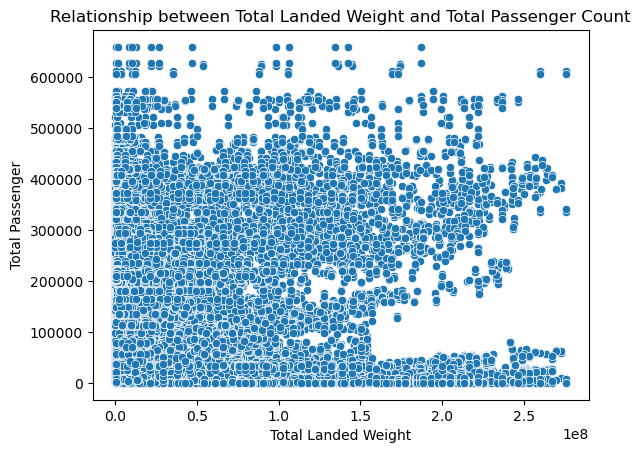

In [69]:
#Relationship between Total Landed Weight and Total Passenger Count using a scatter plot
import seaborn as sns

# create a new dataframe with the columns we need
data_weight_passengers = Combined_fetched_data[['totallandedweight', 'passengercount']]

# create the scatter plot
sns.scatterplot(data=data_weight_passengers, x='totallandedweight', y='passengercount')
plt.xlabel('Total Landed Weight')
plt.ylabel('Total Passenger')
plt.title('Relationship between Total Landed Weight and Total Passenger Count')
plt.show()

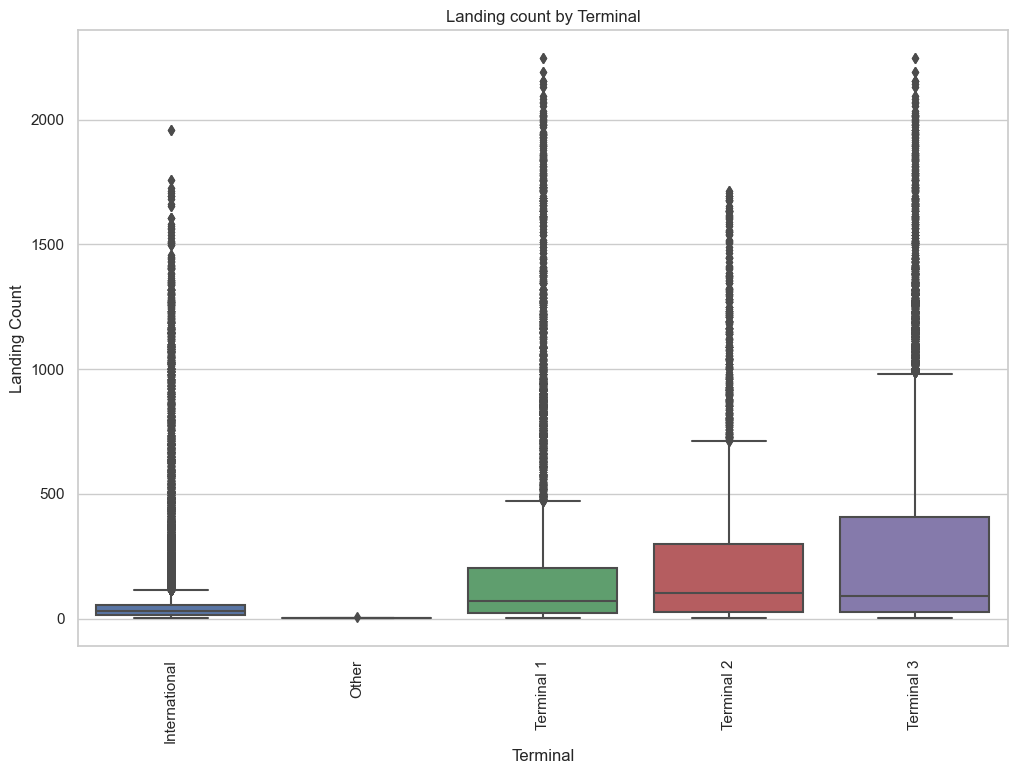

In [74]:
#Landing count in each terminal
#Converting them suitable datatypes so that we can plot them
Combined_fetched_data['landingcount'] = pd.to_numeric(Combined_fetched_data['landingcount'], errors='coerce')
Combined_fetched_data['terminal'] = Combined_fetched_data['terminal'].astype('category')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12,8))
sns.boxplot(x='terminal', y='landingcount', data=Combined_fetched_data)
plt.title('Landing count by Terminal')
plt.xlabel('Terminal')
plt.ylabel('Landing Count')
plt.xticks(rotation=90)
plt.show()

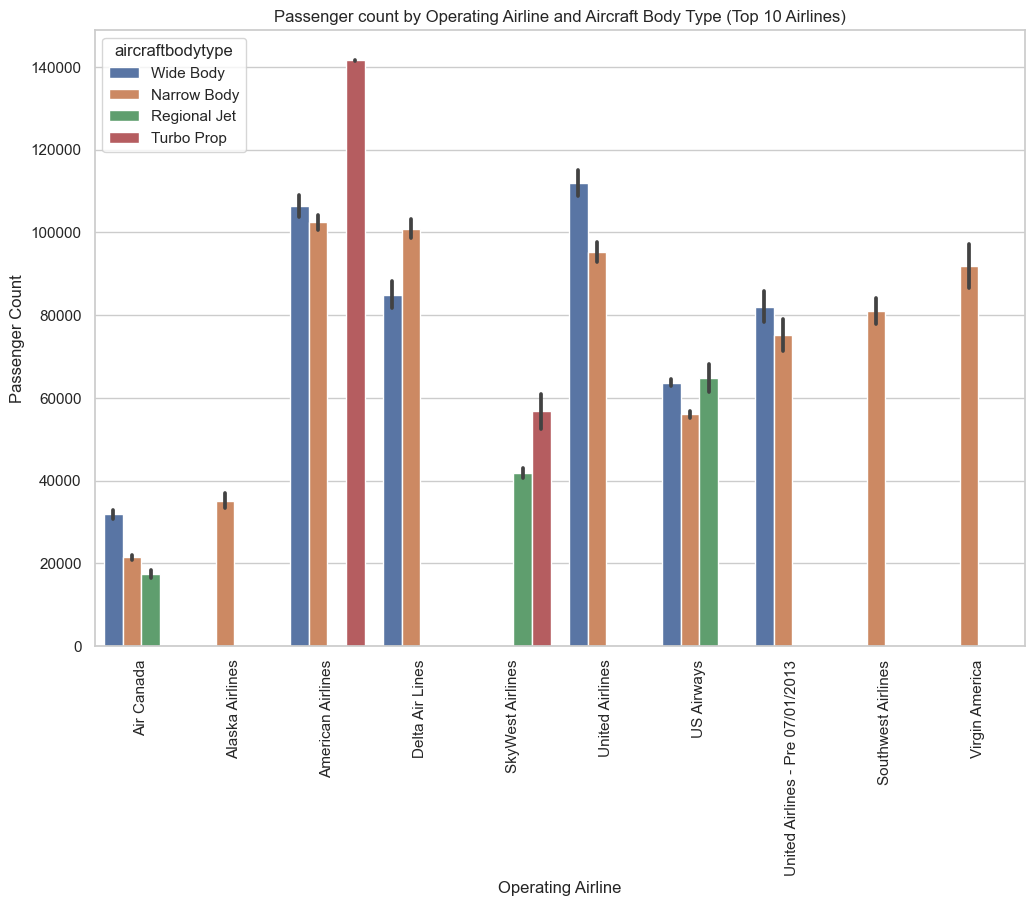

In [72]:
#Passenger count by Operating Airline and Aircraft Body Type using a barplot
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 10 airlines by passenger count
top_10_airlines = Combined_fetched_data.groupby('operatingairline')['passengercount'].sum().nlargest(10).index

# Filter the data to include only the top 10 airlines
combined_top_10 = Combined_fetched_data[Combined_fetched_data['operatingairline'].isin(top_10_airlines)]

sns.set(style="whitegrid")

plt.figure(figsize=(12,8))
sns.barplot(x='operatingairline', y='passengercount', hue='aircraftbodytype', data=combined_top_10)
plt.title('Passenger count by Operating Airline and Aircraft Body Type (Top 10 Airlines)')
plt.xlabel('Operating Airline')
plt.ylabel('Passenger Count')
plt.xticks(rotation=90)
plt.show()

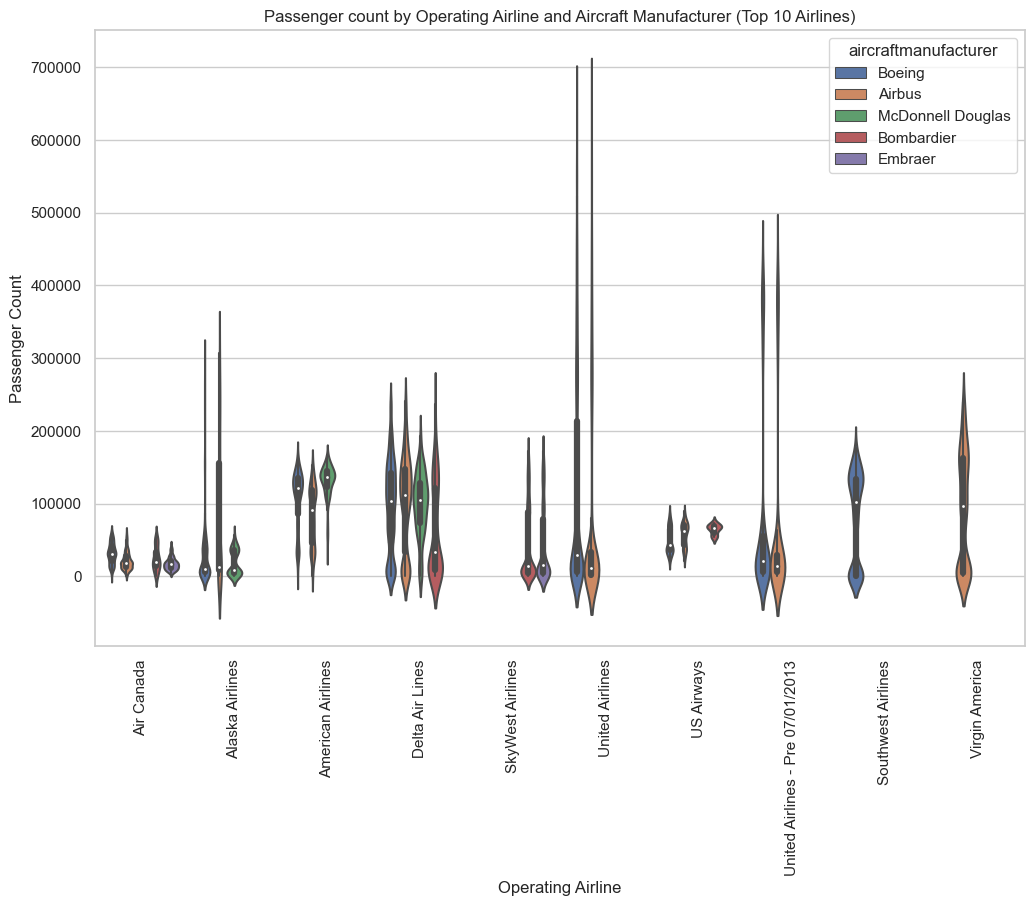

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Filter the top 10 airlines by passenger count
top10_airlines_basedon_passenger_count = Combined_fetched_data.groupby('operatingairline')['passengercount'].sum().nlargest(10).index.tolist()
temp = Combined_fetched_data[Combined_fetched_data['operatingairline'].isin(top10_airlines_basedon_passenger_count)]

# Create the violin plot for passenger count by operating airline and aircraft manufacturer
plt.figure(figsize=(12,8))
sns.violinplot(x='operatingairline', y='passengercount', hue='aircraftmanufacturer', data=temp)
plt.title('Passenger count by Operating Airline and Aircraft Manufacturer (Top 10 Airlines)')
plt.xlabel('Operating Airline')
plt.ylabel('Passenger Count')
plt.xticks(rotation=90)
plt.show()

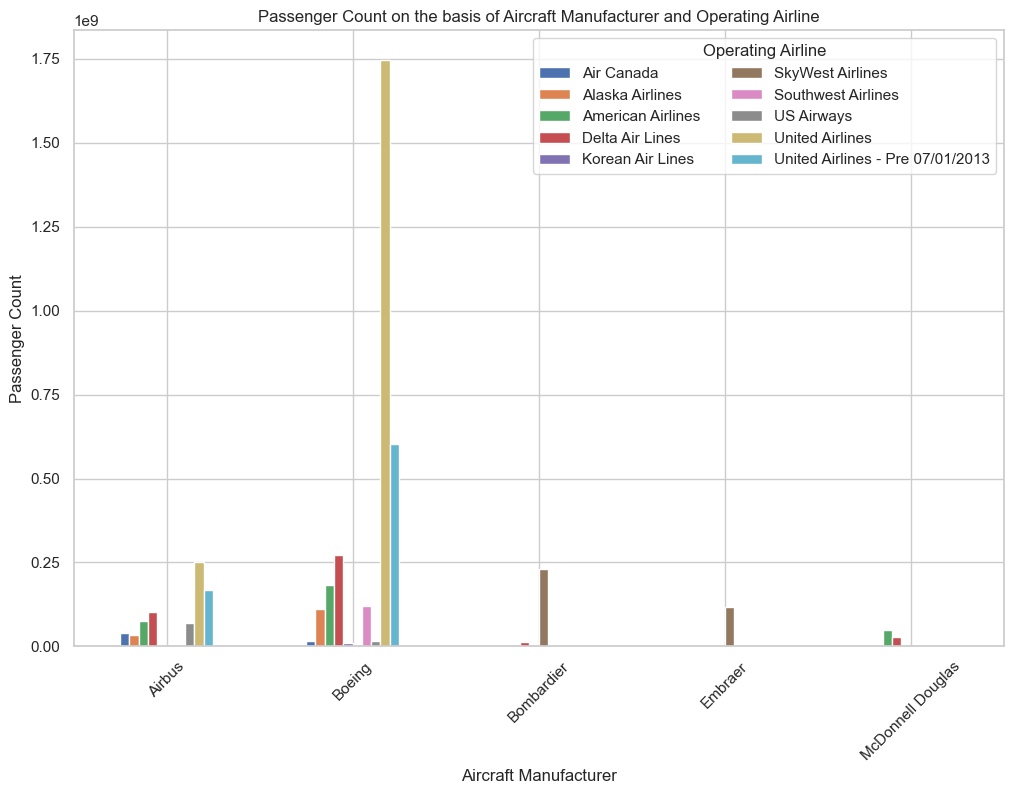

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the top 10 airlines
top_10_airlines = Combined_fetched_data['operatingairline'].value_counts().nlargest(10).index
filtered_data = Combined_fetched_data[Combined_fetched_data['operatingairline'].isin(top_10_airlines)]

# Create a pivot table to aggregate the data by aircraft manufacturer and operating airline
pivot_table = filtered_data.pivot_table(index='aircraftmanufacturer', columns='operatingairline', values='passengercount', aggfunc='sum')

# Create the grouped bar chart
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,8))
pivot_table.plot(kind='bar', ax=ax)
plt.title('Passenger Count on the basis of Aircraft Manufacturer and Operating Airline')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Passenger Count')
plt.legend(title='Operating Airline', loc='best', ncol=2)
plt.xticks(rotation=45)
plt.show()